In [19]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr  # see http://xarray.pydata.org/en/stable/plotting.html
%matplotlib notebook

In [20]:
qdatad = '../runs/RunFr1300/'
ds = xr.open_dataset('../runs/RunFr1300/statevars.nc')
# make new x in km for plotting
ds=ds.assign_coords(XC0 = ds.XC/1000.-ds.XC.mean()/1000.)
ds=ds.assign_coords(XG0 = (ds.XG-ds.XC.mean())/1000.)
TRef=ds.THETA[0,:,0,0]

In [21]:
print(ds)

<xarray.Dataset>
Dimensions:    (i: 80, i_g: 80, j: 1, j_g: 1, k: 25, k_l: 25, k_p1: 26, k_u: 25, record: 53)
Coordinates:
  * record     (record) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * j          (j) int32 0
  * j_g        (j_g) int32 0
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_l        (k_l) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1       (k_p1) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    XC         (j, i) float64 1.237e+04 3.629e+04 5.859e+04 7.925e+04 ...
    XG         (j_g, i_g) float64 7.276e-12 2.474e+04 4.785e+04 6.933e+04 ...
    YC         (j, i) float64 2.5e+03 2.5e+03 2.5e+03 2.5e+03 2.5e+03 ...
    YG         (j_g, i_g) float64 0.

<IPython.core.display.Javascript object>


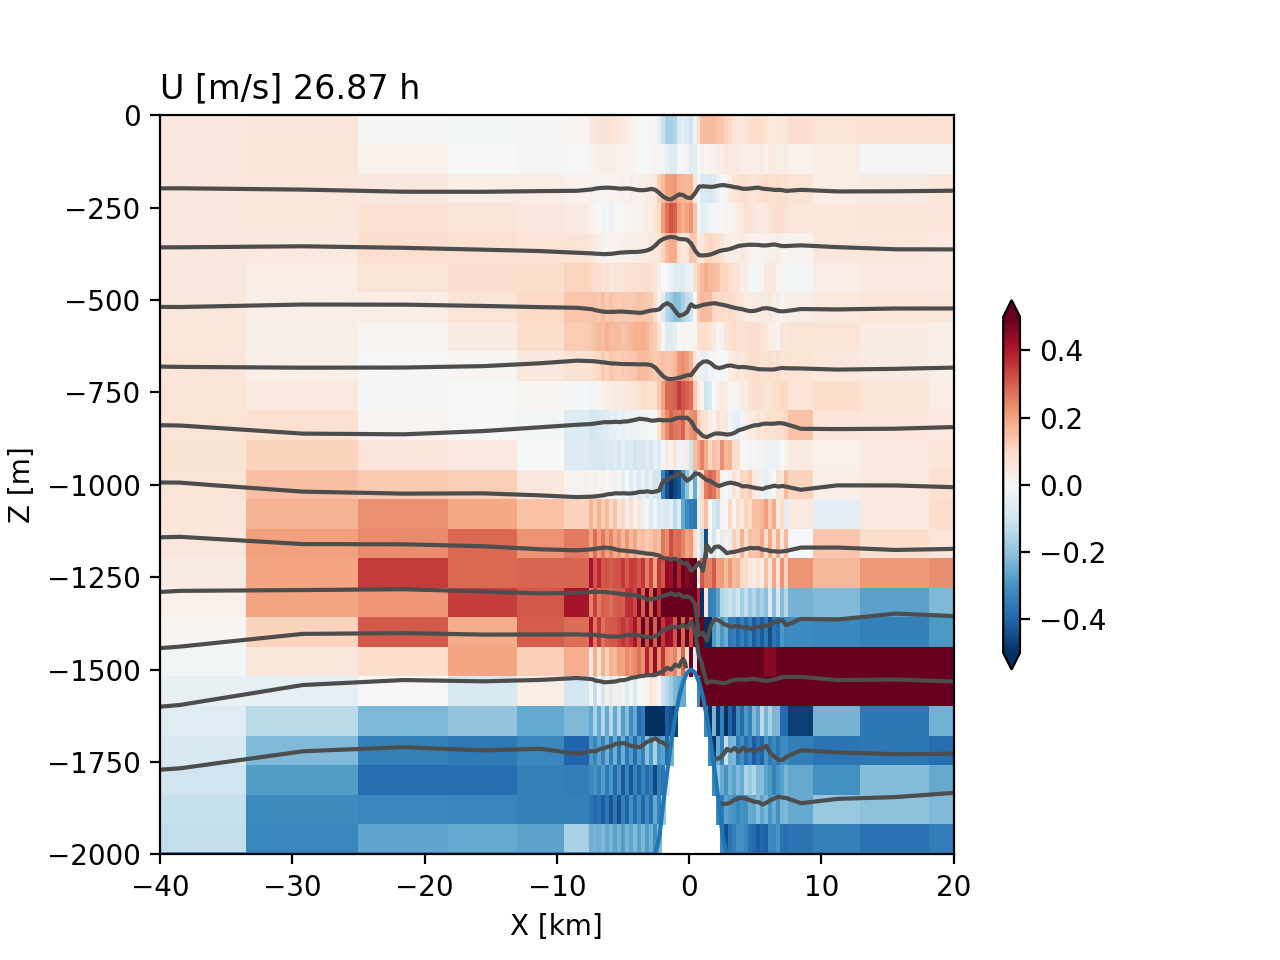

In [22]:
fig,ax = plt.subplots()
T0 = ds.THETA[0,:,:,:]
T= ds.UVEL[-1,:,0,:]
T = np.ma.masked_where(T0[:,0,:]==0,T)
pcm=ax.pcolormesh(ds['XG0'][0,:], ds['Zp1'],T-0.32,vmin=-0.5,vmax=0.5,cmap='RdBu_r',rasterized=True)
T= ds.THETA[-1,:,0,:]
T = np.ma.masked_where(T0[:,0,:]==0,T)
ax.contour(ds['XC0'][0,:], ds['Z'],T,np.sort(TRef[::2]),colors='0.3',)
ax.plot(ds['XC0'][0,:],-ds['Depth'][0,:])
ax.set_xlim([-40.,20.])
fig.colorbar(pcm, ax=ax,shrink=0.5,extend='both')
ax.set_xlabel('X [km]')
ax.set_ylabel('Z [m]')
ax.set_title('U [m/s] %1.2f h'%(ds.timestart[-1]/3600.) ,loc='left')
if 1:
    fig.savefig('../docs/images/Snapshot.png')

In [23]:
print (ds.timestart)

<xarray.DataArray 'timestart' (record: 53)>
array([     0.,   1860.,   3720.,   5580.,   7440.,   9300.,  11160.,  13020.,
        14880.,  16740.,  18600.,  20460.,  22320.,  24180.,  26040.,  27900.,
        29760.,  31620.,  33480.,  35340.,  37200.,  39060.,  40920.,  42780.,
        44640.,  46500.,  48360.,  50220.,  52080.,  53940.,  55800.,  57660.,
        59520.,  61380.,  63240.,  65100.,  66960.,  68820.,  70680.,  72540.,
        74400.,  76260.,  78120.,  79980.,  81840.,  83700.,  85560.,  87420.,
        89280.,  91140.,  93000.,  94860.,  96720.])
Coordinates:
  * record   (record) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
